In [12]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [13]:
df = pd.read_csv("/Users/anastasiahimic/Desktop/hse_python_project_3/analytics/MAIN.csv")

In [14]:
df.head()

,Unnamed: 0,Name,Arts and Humanities 2025,Business and Economics 2025,Computer Science 2025,Education Studies 2025,Engineering 2025,Geo,Industry,International Outlook,...,Psychology,Social Sciences,Female_share,Male_share,International students,No. of FTE students,No. of students per staff,country,town,Overall_num
0,0,University of Oxford,3.0,2.0,1.0,3.0,4.0,"Oxford, United Kingdom",99.9,96.4,...,Psychology,"Communication and Media Studies, Geography, Po...",52.0,48.0,0.43,22005.0,10.4,United Kingdom,Oxford,98.2
1,1,Massachusetts Institute of Technology,1.0,1.0,3.0,3.0,4.0,"Cambridge, United States",100.0,91.9,...,Psychology,"Communication and Media Studies, Politics and ...",43.0,57.0,0.33,11703.0,7.7,United States,Cambridge,97.7
2,2,Princeton University,6.0,6.0,7.0,5.0,3.0,"Princeton, United States",98.0,85.4,...,Psychology,"Politics and International Studies, Sociology",47.0,53.0,0.23,8739.0,8.2,United States,Princeton,97.2
3,3,University of Cambridge,2.0,5.0,2.0,4.0,6.0,"Cambridge, United Kingdom",87.6,96.3,...,Psychology,"Geography, Politics and International Studies,...",50.0,50.0,0.38,21045.0,11.3,United Kingdom,Cambridge,97.2
4,4,Harvard University,5.0,7.0,10.0,5.0,1.0,"Cambridge, United States",86.7,88.3,...,Psychology,"Communication and Media Studies, Politics and ...",53.0,47.0,0.27,22680.0,10.1,United States,Cambridge,97.1


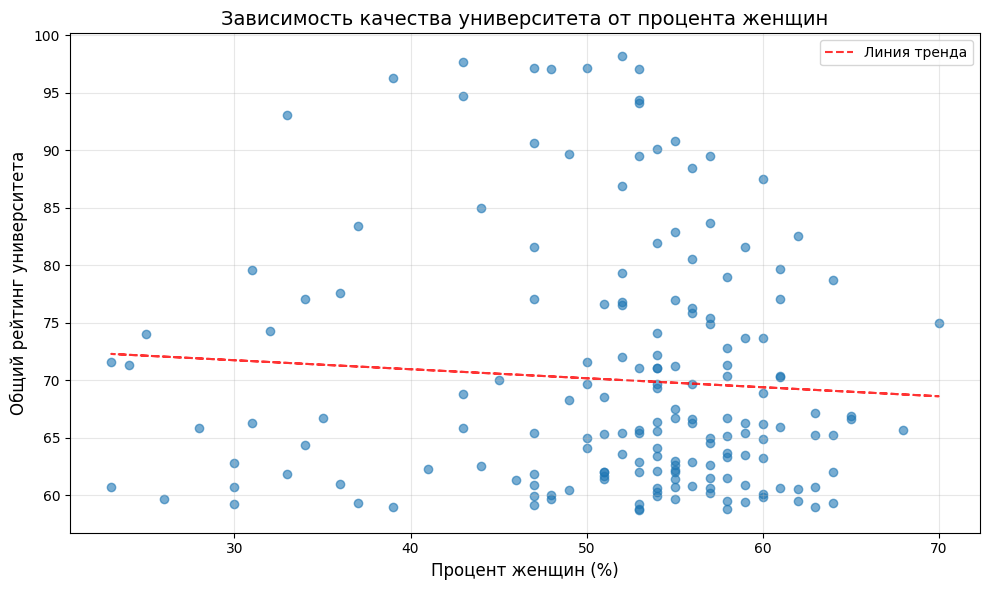

Корреляция Пирсона: -0.070


In [21]:
# Конвертация в числовые значения
df['Overall'] = pd.to_numeric(df['Overall'], errors='coerce')
df['Female_share'] = pd.to_numeric(df['Female_share'], errors='coerce')

# Удаляем NaN для построения линии тренда
df_clean = df[['Female_share', 'Overall']].dropna()

# Создание графика
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_clean['Female_share'], df_clean['Overall'], alpha=0.6)

# Добавление линии тренда
z = np.polyfit(df_clean['Female_share'], df_clean['Overall'], 1)
p = np.poly1d(z)
ax.plot(df_clean['Female_share'], p(df_clean['Female_share']), 
         "r--", alpha=0.8, label='Линия тренда')

# Оформление
ax.set_xlabel('Процент женщин (%)', fontsize=12)
ax.set_ylabel('Общий рейтинг университета', fontsize=12)
ax.set_title('Зависимость качества университета от процента женщин', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)
fig.tight_layout()

plt.show()

# Расчет корреляции
correlation = df_clean['Female_share'].corr(df_clean['Overall'])
print(f'Корреляция Пирсона: {correlation:.3f}')

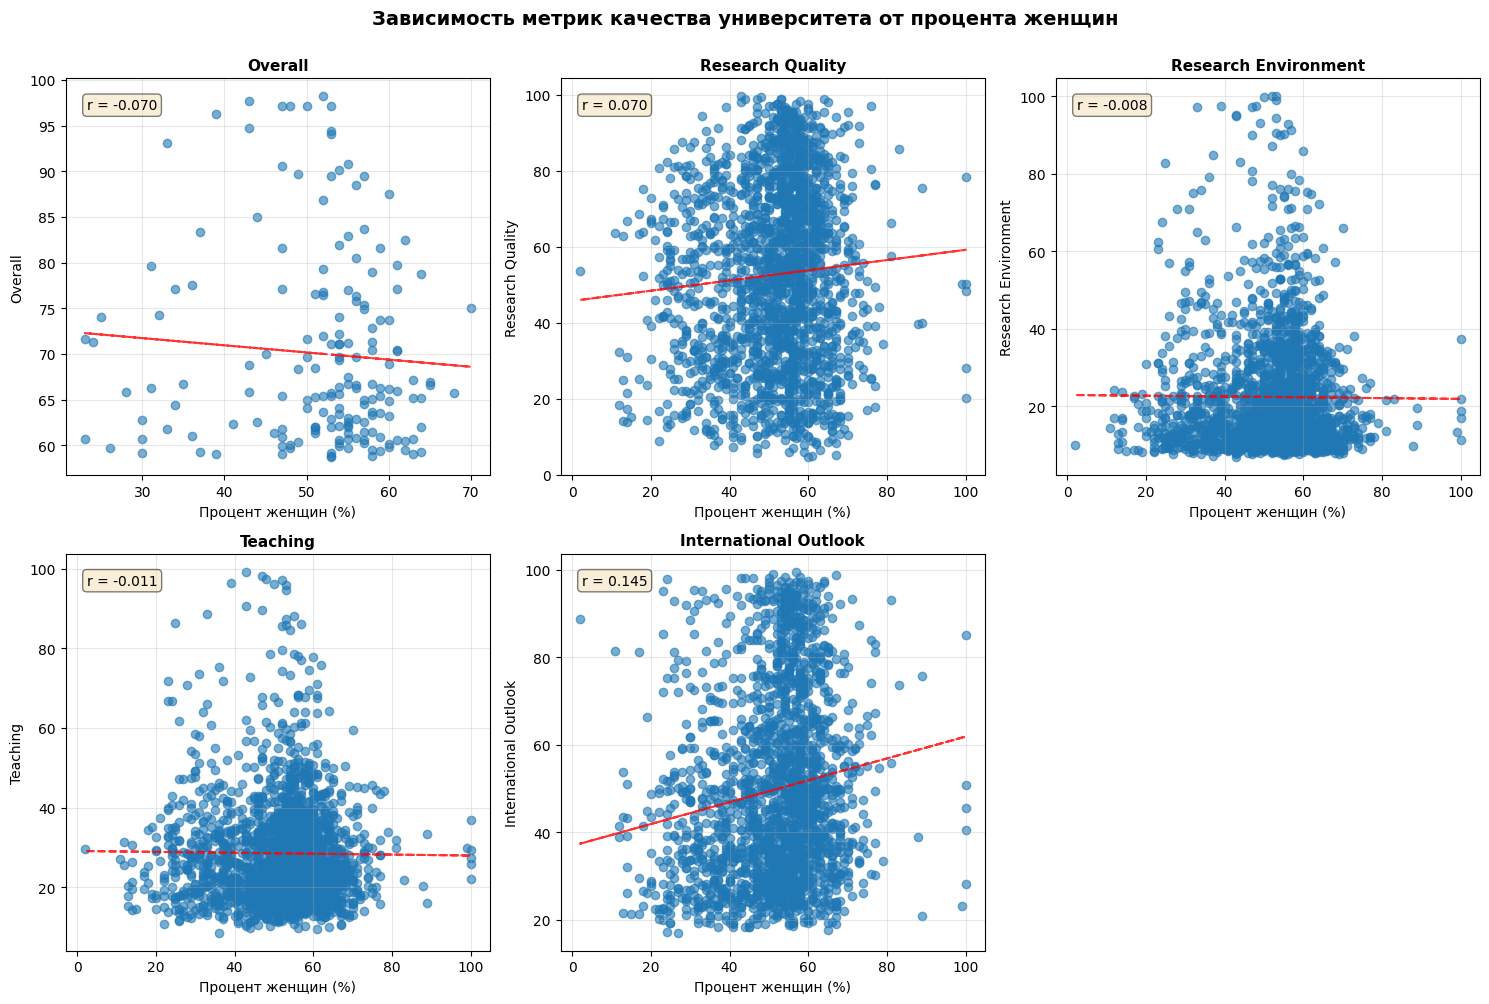


Корреляции с процентом женщин:
--------------------------------------------------
International Outlook         :   0.145
Overall                       :  -0.070
Research Quality              :   0.070
Teaching                      :  -0.011
Research Environment          :  -0.008


In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Список метрик для анализа
metrics = [
    'Overall',
    'Research Quality',
    'Research Environment',
    'Teaching',
    'International Outlook'
]

# Создание сетки графиков
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

correlations = {}

for idx, metric in enumerate(metrics):
    # Конвертация в числовые значения
    df[metric] = pd.to_numeric(df[metric], errors='coerce')
    df['Female_share'] = pd.to_numeric(df['Female_share'], errors='coerce')
    
    # Удаляем NaN
    df_clean = df[['Female_share', metric]].dropna()
    
    if len(df_clean) > 0:
        # Построение графика
        axes[idx].scatter(df_clean['Female_share'], df_clean[metric], alpha=0.6)
        
        # Линия тренда
        z = np.polyfit(df_clean['Female_share'], df_clean[metric], 1)
        p = np.poly1d(z)
        axes[idx].plot(df_clean['Female_share'], p(df_clean['Female_share']), 
                      "r--", alpha=0.8)
        
        # Оформление
        axes[idx].set_xlabel('Процент женщин (%)', fontsize=10)
        axes[idx].set_ylabel(metric, fontsize=10)
        axes[idx].set_title(f'{metric}', fontsize=11, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)
        
        # Корреляция
        corr = df_clean['Female_share'].corr(df_clean[metric])
        correlations[metric] = corr
        axes[idx].text(0.05, 0.95, f'r = {corr:.3f}', 
                      transform=axes[idx].transAxes,
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Удаляем лишний subplot
fig.delaxes(axes[5])

fig.suptitle('Зависимость метрик качества университета от процента женщин', 
             fontsize=14, fontweight='bold', y=1.00)
fig.tight_layout()

plt.savefig('university_metrics_gender.png', dpi=300, bbox_inches='tight')
plt.show()

# Вывод всех корреляций
print("\nКорреляции с процентом женщин:")
print("-" * 50)
for metric, corr in sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{metric:30s}: {corr:7.3f}")


                  Area  Female %    Male %    N
     Physical Sciences 55.647799 44.352201  512
       Social Sciences 55.623853 44.376147  353
         Life Sciences 55.350584 44.649416  645
                   Law 55.121001 44.878999  775
           Engineering 54.663855 45.336145  893
     Education Studies 53.886831 46.113169 1040
      Computer Science 52.926661 47.073339 1230
    Medical and Health 52.049928 47.950072 1454
Business and Economics 51.742115 48.257885 1693
   Arts and Humanities 51.709695 48.290305 1918


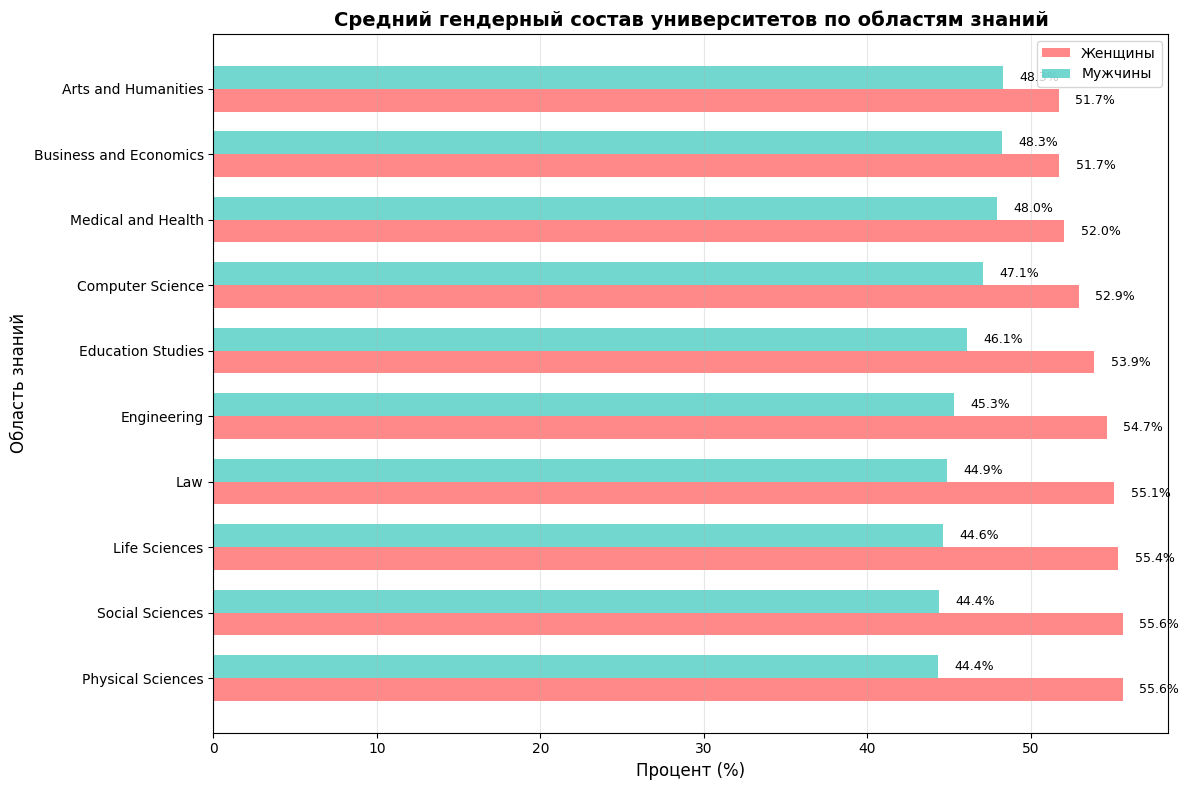


Гендерный разрыв (положительное значение = больше женщин):
                  Area  Gender Gap
     Physical Sciences   11.295597
       Social Sciences   11.247706
         Life Sciences   10.701169
                   Law   10.242003
           Engineering    9.327711
     Education Studies    7.773663
      Computer Science    5.853322
    Medical and Health    4.099855
Business and Economics    3.484230
   Arts and Humanities    3.419390


In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Список областей знаний (subject areas)
subject_areas = [
    'Arts and Humanities 2025',
    'Business and Economics 2025',
    'Computer Science 2025',
    'Education Studies 2025',
    'Engineering 2025',
    'Law 2025',
    'Life Sciences 2025',
    'Medical and Health 2025',
    'Physical Sciences 2025',
    'Social Sciences 2025'
]

# Конвертируем Female_share и Male_share в числовые
df['Female_share'] = pd.to_numeric(df['Female_share'], errors='coerce')
df['Male_share'] = pd.to_numeric(df['Male_share'], errors='coerce')

# Вычисляем средний процент женщин и мужчин для каждой области
results = []

for area in subject_areas:
    # Конвертируем область в числовые значения (это рейтинг)
    df[area] = pd.to_numeric(df[area], errors='coerce')
    
    # Берем только университеты, у которых есть рейтинг в этой области
    df_area = df[df[area].notna()][['Female_share', 'Male_share', area]]
    
    if len(df_area) > 0:
        avg_female = df_area['Female_share'].mean()
        avg_male = df_area['Male_share'].mean()
        count = len(df_area)
        
        results.append({
            'Area': area.replace(' 2025', ''),
            'Female %': avg_female,
            'Male %': avg_male,
            'N': count
        })

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Female %', ascending=False)

print(results_df.to_string(index=False))

# Визуализация
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(results_df))
width = 0.35

bars1 = ax.barh(x - width/2, results_df['Female %'], width, 
                label='Женщины', color='#FF6B6B', alpha=0.8)
bars2 = ax.barh(x + width/2, results_df['Male %'], width, 
                label='Мужчины', color='#4ECDC4', alpha=0.8)

# Добавляем значения на графике
for i, (f, m) in enumerate(zip(results_df['Female %'], results_df['Male %'])):
    ax.text(f + 1, i - width/2, f'{f:.1f}%', va='center', fontsize=9)
    ax.text(m + 1, i + width/2, f'{m:.1f}%', va='center', fontsize=9)

ax.set_xlabel('Процент (%)', fontsize=12)
ax.set_ylabel('Область знаний', fontsize=12)
ax.set_title('Средний гендерный состав университетов по областям знаний', 
             fontsize=14, fontweight='bold')
ax.set_yticks(x)
ax.set_yticklabels(results_df['Area'])
ax.legend()
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Расчет разницы
results_df['Gender Gap'] = results_df['Female %'] - results_df['Male %']
print("\n" + "="*60)
print("Гендерный разрыв (положительное значение = больше женщин):")
print("="*60)
print(results_df[['Area', 'Gender Gap']].to_string(index=False))


1. Гендерный разрыв по странам
                         Female_share  Male_share  N_universities  Gender_Gap
country                                                                      
Turkmenistan                81.000000   19.000000              13   62.000000
Palestinian Territories     70.000000   30.000000               6   40.000000
Tunisia                     67.888889   32.111111              10   35.777778
Bahrain                     66.333333   33.666667               6   32.666667
Algeria                     65.613636   34.386364              59   31.227273
Oman                        64.250000   35.750000              10   28.500000
Kuwait                      62.000000   38.000000               6   24.000000
South Africa                61.461538   38.538462              13   22.923077
Libya                       61.000000   39.000000               5   22.000000
Thailand                    60.950000   39.050000              29   21.900000
Argentina                   60.20

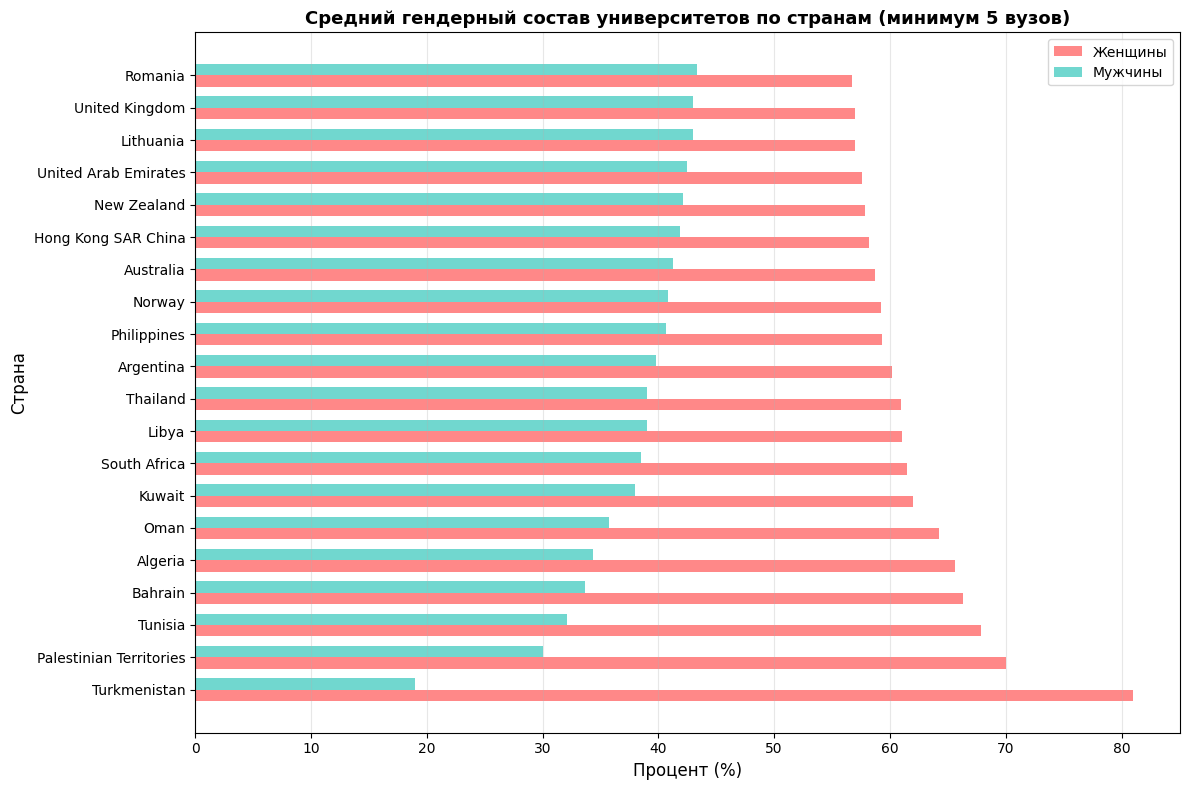


3. Распределение университетов по гендерным квартилям
                     Overall  Research Quality  Research Environment  \
Gender_Quartile                                                        
Q1 (Мало женщин)   71.370968         48.230000             21.183922   
Q2                 71.479687         55.241270             24.068607   
Q3                 68.718000         56.134056             23.725813   
Q4 (Много женщин)  67.662069         51.087269             20.279671   

                    Teaching  Female_share    N  
Gender_Quartile                                  
Q1 (Мало женщин)   27.758039     34.677700  574  
Q2                 29.758377     50.539580  619  
Q3                 29.538829     56.878049  492  
Q4 (Много женщин)  26.953799     66.090909  550  


/var/folders/xp/w27tw8rj1yq_fp98wz42_9q80000gn/T/ipykernel_61201/2083038907.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_stats = df.groupby('Gender_Quartile').agg({


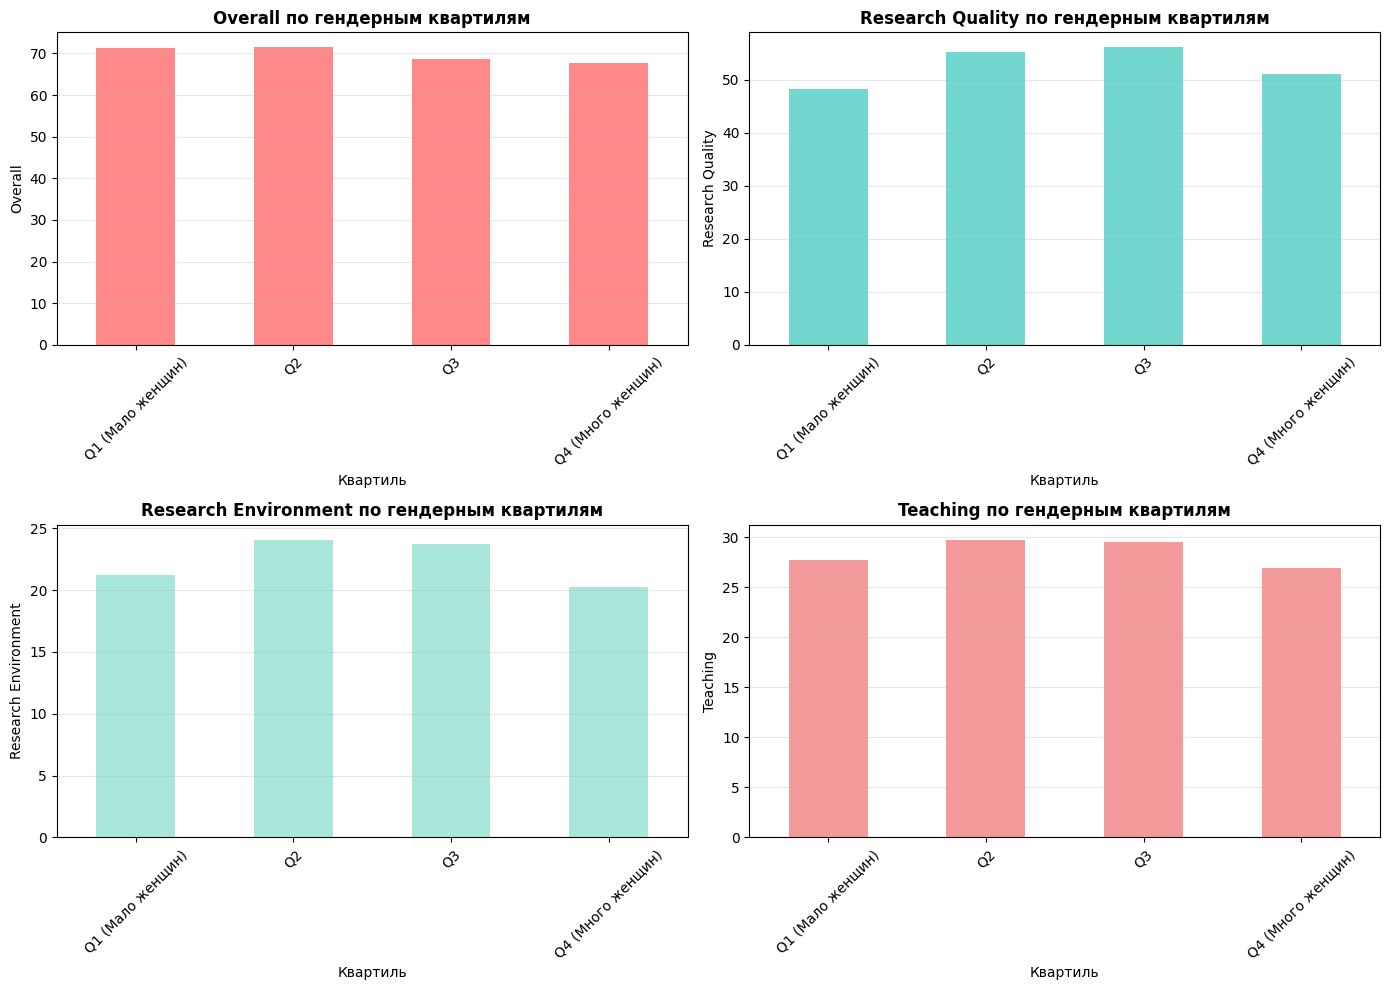


4. Гендерный баланс в топ-100 vs остальные
             Female_share                  Male_share           
                     mean        std count       mean        std
Top_Category                                                    
Остальные       51.696928  12.880194  2181  48.303072  12.880194
Топ-100         51.333333   8.760977    54  48.666667   8.760977


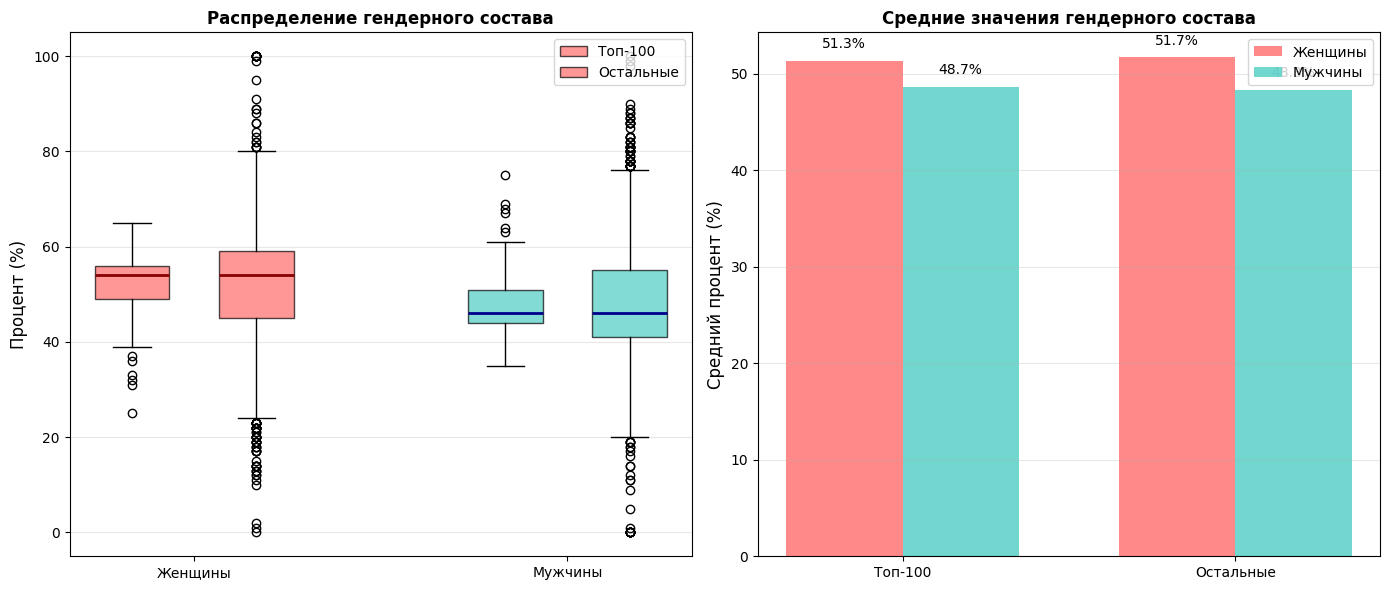


7. Размер университета vs гендерный состав
                     Female_share No. of FTE students      
                             mean                mean count
Size_Category                                              
Малый (<5k)             34.500000         1550.500000     2
Средний (5-15k)         48.000000        10406.000000    30
Большой (15-30k)        51.256757        21815.527027    74
Очень большой (>30k)    54.426471        43514.705882    68


/var/folders/xp/w27tw8rj1yq_fp98wz42_9q80000gn/T/ipykernel_61201/2083038907.py:164: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_size.groupby('Size_Category').agg({
/var/folders/xp/w27tw8rj1yq_fp98wz42_9q80000gn/T/ipykernel_61201/2083038907.py:194: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(data_to_plot, labels=labels_to_plot, patch_artist=True,


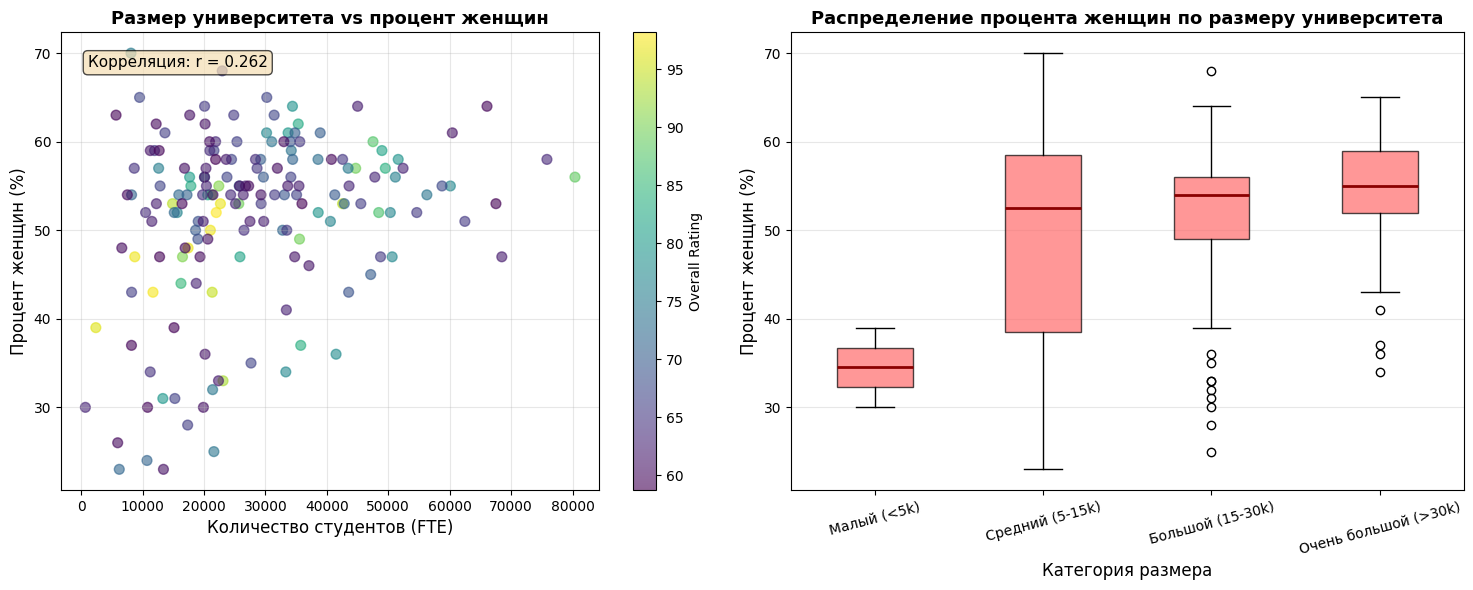

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Конвертируем необходимые столбцы
df['Female_share'] = pd.to_numeric(df['Female_share'], errors='coerce')
df['Male_share'] = pd.to_numeric(df['Male_share'], errors='coerce')
df['Overall'] = pd.to_numeric(df['Overall'], errors='coerce')
df['No. of FTE students'] = pd.to_numeric(df['No. of FTE students'], errors='coerce')
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

# ============================================================
# 1. Гендерный разрыв по странам (топ-20)
# ============================================================
print("1. Гендерный разрыв по странам")
print("="*60)

country_gender = df.groupby('country').agg({
    'Female_share': 'mean',
    'Male_share': 'mean',
    'Name': 'count'
}).rename(columns={'Name': 'N_universities'})

country_gender['Gender_Gap'] = country_gender['Female_share'] - country_gender['Male_share']
country_gender = country_gender[country_gender['N_universities'] >= 5].sort_values('Female_share', ascending=False).head(20)

print(country_gender)

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(country_gender))
width = 0.35

bars1 = ax.barh(x - width/2, country_gender['Female_share'], width, 
                label='Женщины', color='#FF6B6B', alpha=0.8)
bars2 = ax.barh(x + width/2, country_gender['Male_share'], width, 
                label='Мужчины', color='#4ECDC4', alpha=0.8)

ax.set_xlabel('Процент (%)', fontsize=12)
ax.set_ylabel('Страна', fontsize=12)
ax.set_title('Средний гендерный состав университетов по странам (минимум 5 вузов)', 
             fontsize=13, fontweight='bold')
ax.set_yticks(x)
ax.set_yticklabels(country_gender.index)
ax.legend()
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# ============================================================
# 3. Распределение университетов по гендерным квартилям
# ============================================================
print("\n3. Распределение университетов по гендерным квартилям")
print("="*60)

df['Gender_Quartile'] = pd.qcut(df['Female_share'], q=4, labels=['Q1 (Мало женщин)', 'Q2', 'Q3', 'Q4 (Много женщин)'])

quartile_stats = df.groupby('Gender_Quartile').agg({
    'Overall': 'mean',
    'Research Quality': lambda x: pd.to_numeric(x, errors='coerce').mean(),
    'Research Environment': lambda x: pd.to_numeric(x, errors='coerce').mean(),
    'Teaching': lambda x: pd.to_numeric(x, errors='coerce').mean(),
    'Female_share': 'mean',
    'Name': 'count'
}).rename(columns={'Name': 'N'})

print(quartile_stats)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Overall', 'Research Quality', 'Research Environment', 'Teaching']
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181']

for idx, metric in enumerate(metrics):
    ax = axes[idx//2, idx%2]
    quartile_stats[metric].plot(kind='bar', ax=ax, color=colors[idx], alpha=0.8)
    ax.set_title(f'{metric} по гендерным квартилям', fontsize=12, fontweight='bold')
    ax.set_xlabel('Квартиль', fontsize=10)
    ax.set_ylabel(metric, fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ============================================================
# 4. Гендерный баланс в топ-100 vs остальные
# ============================================================
print("\n4. Гендерный баланс в топ-100 vs остальные")
print("="*60)

df['Top_Category'] = df['Rank'].apply(lambda x: 'Топ-100' if x <= 100 else 'Остальные')

top_comparison = df.groupby('Top_Category').agg({
    'Female_share': ['mean', 'std', 'count'],
    'Male_share': ['mean', 'std']
})

print(top_comparison)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
df_box = df[df['Top_Category'].notna()][['Top_Category', 'Female_share', 'Male_share']]
positions = [1, 2, 4, 5]
bp1 = ax1.boxplot([df_box[df_box['Top_Category']=='Топ-100']['Female_share'].dropna(),
                    df_box[df_box['Top_Category']=='Остальные']['Female_share'].dropna()],
                   positions=[1, 2], widths=0.6, patch_artist=True,
                   boxprops=dict(facecolor='#FF6B6B', alpha=0.7),
                   medianprops=dict(color='darkred', linewidth=2))

bp2 = ax1.boxplot([df_box[df_box['Top_Category']=='Топ-100']['Male_share'].dropna(),
                    df_box[df_box['Top_Category']=='Остальные']['Male_share'].dropna()],
                   positions=[4, 5], widths=0.6, patch_artist=True,
                   boxprops=dict(facecolor='#4ECDC4', alpha=0.7),
                   medianprops=dict(color='darkblue', linewidth=2))

ax1.set_xticks([1.5, 4.5])
ax1.set_xticklabels(['Женщины', 'Мужчины'])
ax1.set_ylabel('Процент (%)', fontsize=12)
ax1.set_title('Распределение гендерного состава', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.legend([bp1["boxes"][0], bp1["boxes"][1]], ['Топ-100', 'Остальные'], loc='upper right')

# Bar plot средних значений
categories = df['Top_Category'].unique()
categories = [c for c in ['Топ-100', 'Остальные'] if c in categories]
female_means = [df[df['Top_Category']==cat]['Female_share'].mean() for cat in categories]
male_means = [df[df['Top_Category']==cat]['Male_share'].mean() for cat in categories]

x = np.arange(len(categories))
width = 0.35

ax2.bar(x - width/2, female_means, width, label='Женщины', color='#FF6B6B', alpha=0.8)
ax2.bar(x + width/2, male_means, width, label='Мужчины', color='#4ECDC4', alpha=0.8)

for i, (f, m) in enumerate(zip(female_means, male_means)):
    ax2.text(i - width/2, f + 1, f'{f:.1f}%', ha='center', va='bottom', fontsize=10)
    ax2.text(i + width/2, m + 1, f'{m:.1f}%', ha='center', va='bottom', fontsize=10)

ax2.set_ylabel('Средний процент (%)', fontsize=12)
ax2.set_title('Средние значения гендерного состава', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(categories)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================
# 7. Размер университета vs гендерный состав
# ============================================================
print("\n7. Размер университета vs гендерный состав")
print("="*60)

df_size = df[['No. of FTE students', 'Female_share', 'Overall']].dropna()

# Категоризация по размеру
df_size['Size_Category'] = pd.cut(df_size['No. of FTE students'], 
                                   bins=[0, 5000, 15000, 30000, 100000],
                                   labels=['Малый (<5k)', 'Средний (5-15k)', 
                                          'Большой (15-30k)', 'Очень большой (>30k)'])

print(df_size.groupby('Size_Category').agg({
    'Female_share': 'mean',
    'No. of FTE students': ['mean', 'count']
}))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot
scatter = ax1.scatter(df_size['No. of FTE students'], df_size['Female_share'], 
                     c=df_size['Overall'], cmap='viridis', alpha=0.6, s=50)
ax1.set_xlabel('Количество студентов (FTE)', fontsize=12)
ax1.set_ylabel('Процент женщин (%)', fontsize=12)
ax1.set_title('Размер университета vs процент женщин', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Overall Rating', fontsize=10)

# Корреляция
corr = df_size['No. of FTE students'].corr(df_size['Female_share'])
ax1.text(0.05, 0.95, f'Корреляция: r = {corr:.3f}', 
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7), fontsize=11)

# Box plot по категориям размера
df_size_clean = df_size.dropna(subset=['Size_Category'])
size_order = ['Малый (<5k)', 'Средний (5-15k)', 'Большой (15-30k)', 'Очень большой (>30k)']
data_to_plot = [df_size_clean[df_size_clean['Size_Category']==cat]['Female_share'].values 
                for cat in size_order if cat in df_size_clean['Size_Category'].values]
labels_to_plot = [cat for cat in size_order if cat in df_size_clean['Size_Category'].values]

bp = ax2.boxplot(data_to_plot, labels=labels_to_plot, patch_artist=True,
                 boxprops=dict(facecolor='#FF6B6B', alpha=0.7),
                 medianprops=dict(color='darkred', linewidth=2))

ax2.set_ylabel('Процент женщин (%)', fontsize=12)
ax2.set_xlabel('Категория размера', fontsize=12)
ax2.set_title('Распределение процента женщин по размеру университета', fontsize=13, fontweight='bold')
ax2.tick_params(axis='x', rotation=15)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()



In [29]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Конвертация данных
df['Female_share'] = pd.to_numeric(df['Female_share'], errors='coerce')
df['Male_share'] = pd.to_numeric(df['Male_share'], errors='coerce')
df['Overall'] = pd.to_numeric(df['Overall'], errors='coerce')
df['No. of FTE students'] = pd.to_numeric(df['No. of FTE students'], errors='coerce')
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')
df['Research Quality'] = pd.to_numeric(df['Research Quality'], errors='coerce')
df['Teaching'] = pd.to_numeric(df['Teaching'], errors='coerce')
df['International students'] = pd.to_numeric(df['International students'], errors='coerce')

print("="*70)
print("СТАТИСТИЧЕСКАЯ ПРОВЕРКА ГИПОТЕЗ О ГЕНДЕРНОМ СОСТАВЕ УНИВЕРСИТЕТОВ")
print("="*70)

# ============================================================
# ГИПОТЕЗА 1: Размер университета влияет на процент женщин
# ============================================================
print("\n" + "="*70)
print("ГИПОТЕЗА 1: Размер университета положительно коррелирует с % женщин")
print("="*70)

print("\nH0 (нулевая): Корреляция между размером университета и % женщин = 0")
print("H1 (альтернативная): Корреляция между размером университета и % женщин ≠ 0")

df_h1 = df[['No. of FTE students', 'Female_share']].dropna()
corr_coef, p_value = stats.pearsonr(df_h1['No. of FTE students'], df_h1['Female_share'])

print(f"\nКоэффициент корреляции Пирсона: r = {corr_coef:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Размер выборки: n = {len(df_h1)}")

if p_value < 0.001:
    print(f"✓ ВЫВОД: Отклоняем H0 (p < 0.001). Статистически значимая положительная связь!")
elif p_value < 0.05:
    print(f"✓ ВЫВОД: Отклоняем H0 (p < 0.05). Статистически значимая связь.")
else:
    print(f"✗ ВЫВОД: Не можем отклонить H0 (p > 0.05). Связь не значима.")

# Дополнительно: тест Спирмена (для непараметрической проверки)
spearman_coef, spearman_p = stats.spearmanr(df_h1['No. of FTE students'], df_h1['Female_share'])
print(f"\nКоэффициент корреляции Спирмена: ρ = {spearman_coef:.4f}")
print(f"P-value (Спирмен): {spearman_p:.6f}")

# ============================================================
# ГИПОТЕЗА 2: Топ-100 университеты имеют другой гендерный баланс
# ============================================================
print("\n" + "="*70)
print("ГИПОТЕЗА 2: Гендерный баланс в топ-100 отличается от остальных")
print("="*70)

print("\nH0: Средний % женщин в топ-100 = средний % женщин в остальных")
print("H1: Средний % женщин в топ-100 ≠ средний % женщин в остальных")

top100 = df[df['Rank'] <= 100]['Female_share'].dropna()
rest = df[df['Rank'] > 100]['Female_share'].dropna()

print(f"\nТоп-100: среднее = {top100.mean():.2f}%, std = {top100.std():.2f}%, n = {len(top100)}")
print(f"Остальные: среднее = {rest.mean():.2f}%, std = {rest.std():.2f}%, n = {len(rest)}")
print(f"Разница средних: {top100.mean() - rest.mean():.2f}%")

# Тест на нормальность (Shapiro-Wilk)
_, p_norm_top = stats.shapiro(top100.sample(min(5000, len(top100))))
_, p_norm_rest = stats.shapiro(rest.sample(min(5000, len(rest))))
print(f"\nТест на нормальность (Shapiro-Wilk):")
print(f"Топ-100: p = {p_norm_top:.4f}")
print(f"Остальные: p = {p_norm_rest:.4f}")

# t-test (параметрический)
t_stat, t_p = stats.ttest_ind(top100, rest)
print(f"\nДвухвыборочный t-test:")
print(f"t-статистика: {t_stat:.4f}")
print(f"P-value: {t_p:.6f}")

# Mann-Whitney U test (непараметрический)
u_stat, u_p = stats.mannwhitneyu(top100, rest, alternative='two-sided')
print(f"\nMann-Whitney U test:")
print(f"U-статистика: {u_stat:.4f}")
print(f"P-value: {u_p:.6f}")

if t_p < 0.05:
    print(f"✓ ВЫВОД: Отклоняем H0 (p < 0.05). Есть значимая разница!")
else:
    print(f"✗ ВЫВОД: Не можем отклонить H0 (p > 0.05). Нет значимой разницы.")

# ============================================================
# ГИПОТЕЗА 3: Гендерный состав связан с качеством исследований
# ============================================================
print("\n" + "="*70)
print("ГИПОТЕЗА 3: % женщин коррелирует с качеством исследований")
print("="*70)

print("\nH0: Корреляция между % женщин и Research Quality = 0")
print("H1: Корреляция между % женщин и Research Quality ≠ 0")

df_h3 = df[['Female_share', 'Research Quality']].dropna()
corr3, p3 = stats.pearsonr(df_h3['Female_share'], df_h3['Research Quality'])

print(f"\nКоэффициент корреляции: r = {corr3:.4f}")
print(f"P-value: {p3:.6f}")
print(f"Размер выборки: n = {len(df_h3)}")

if p3 < 0.05:
    print(f"✓ ВЫВОД: Отклоняем H0 (p < 0.05). Есть связь между % женщин и Research Quality.")
else:
    print(f"✗ ВЫВОД: Не можем отклонить H0 (p > 0.05). Связь не значима.")

# ============================================================
# ГИПОТЕЗА 4: Гендерный баланс различается между размерными категориями
# ============================================================
print("\n" + "="*70)
print("ГИПОТЕЗА 4: % женщин различается между категориями размера университета")
print("="*70)

print("\nH0: Средний % женщин одинаков во всех категориях размера")
print("H1: Средний % женщин различается хотя бы в одной категории")

df_h4 = df[['No. of FTE students', 'Female_share']].dropna()
df_h4['Size_Category'] = pd.cut(df_h4['No. of FTE students'], 
                                 bins=[0, 5000, 15000, 30000, 100000],
                                 labels=['Small', 'Medium', 'Large', 'Very Large'])

groups = [group['Female_share'].values for name, group in df_h4.groupby('Size_Category')]

# ANOVA (one-way)
f_stat, anova_p = stats.f_oneway(*groups)
print(f"\nOne-way ANOVA:")
print(f"F-статистика: {f_stat:.4f}")
print(f"P-value: {anova_p:.6f}")

# Kruskal-Wallis (непараметрическая альтернатива ANOVA)
h_stat, kw_p = stats.kruskal(*groups)
print(f"\nKruskal-Wallis test:")
print(f"H-статистика: {h_stat:.4f}")
print(f"P-value: {kw_p:.6f}")

if anova_p < 0.001:
    print(f"✓ ВЫВОД: Отклоняем H0 (p < 0.001). Есть высоко значимые различия между группами!")
elif anova_p < 0.05:
    print(f"✓ ВЫВОД: Отклоняем H0 (p < 0.05). Есть значимые различия между группами.")
else:
    print(f"✗ ВЫВОД: Не можем отклонить H0. Нет значимых различий.")

# Post-hoc: попарные сравнения (Tukey HSD)
if anova_p < 0.05:
    print("\nPost-hoc анализ (попарные сравнения):")
    from itertools import combinations
    categories = ['Small', 'Medium', 'Large', 'Very Large']
    
    for i, (cat1, cat2) in enumerate(combinations(range(len(categories)), 2)):
        g1 = groups[cat1]
        g2 = groups[cat2]
        _, p_pair = stats.ttest_ind(g1, g2)
        
        # Bonferroni correction
        p_corrected = min(p_pair * 6, 1.0)  # 6 попарных сравнений
        
        print(f"{categories[cat1]} vs {categories[cat2]}: "
              f"p = {p_pair:.4f}, p_corrected = {p_corrected:.4f} "
              f"{'*' if p_corrected < 0.05 else ''}")

# ============================================================
# ГИПОТЕЗА 5: % женщин в STEM областях ниже среднего
# ============================================================
print("\n" + "="*70)
print("ГИПОТЕЗА 5: % женщин в STEM областях ниже, чем в гуманитарных")
print("="*70)

print("\nH0: Средний % женщин в STEM = средний % женщин в Arts/Social Sciences")
print("H1: Средний % женщин в STEM < средний % женщин в Arts/Social Sciences")

# STEM области
stem_areas = ['Computer Science 2025', 'Engineering 2025', 'Physical Sciences 2025']
# Гуманитарные/социальные
humanities_areas = ['Arts and Humanities 2025', 'Social Sciences 2025']

stem_unis = df[df[stem_areas].notna().any(axis=1)]['Female_share'].dropna()
humanities_unis = df[df[humanities_areas].notna().any(axis=1)]['Female_share'].dropna()

print(f"\nУниверситеты с STEM: среднее = {stem_unis.mean():.2f}%, n = {len(stem_unis)}")
print(f"Университеты с гуманитарными: среднее = {humanities_unis.mean():.2f}%, n = {len(humanities_unis)}")
print(f"Разница: {humanities_unis.mean() - stem_unis.mean():.2f}%")

# Односторонний t-test
t_stem, p_stem = stats.ttest_ind(humanities_unis, stem_unis, alternative='greater')
print(f"\nОдносторонний t-test:")
print(f"t-статистика: {t_stem:.4f}")
print(f"P-value: {p_stem:.6f}")

if p_stem < 0.05:
    print(f"✓ ВЫВОД: Отклоняем H0 (p < 0.05). В гуманитарных вузах значимо больше женщин!")
else:
    print(f"✗ ВЫВОД: Не можем отклонить H0. Нет значимой разницы.")

# ============================================================
# ИТОГОВАЯ ТАБЛИЦА
# ============================================================
print("\n" + "="*70)
print("ИТОГОВАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*70)

results_summary = pd.DataFrame({
    'Гипотеза': [
        'H1: Размер↔% женщин',
        'H2: Топ-100 vs остальные',
        'H3: % женщин↔Research Quality',
        'H4: Различия по размеру',
        'H5: STEM vs Humanities'
    ],
    'Тест': [
        'Pearson correlation',
        't-test / Mann-Whitney',
        'Pearson correlation',
        'ANOVA / Kruskal-Wallis',
        't-test (one-sided)'
    ],
    'Статистика': [
        f'r = {corr_coef:.4f}',
        f't = {t_stat:.4f}',
        f'r = {corr3:.4f}',
        f'F = {f_stat:.4f}',
        f't = {t_stem:.4f}'
    ],
    'P-value': [
        f'{p_value:.6f}',
        f'{t_p:.6f}',
        f'{p3:.6f}',
        f'{anova_p:.6f}',
        f'{p_stem:.6f}'
    ],
    'Результат': [
        '✓ Значима' if p_value < 0.05 else '✗ Не значима',
        '✓ Значима' if t_p < 0.05 else '✗ Не значима',
        '✓ Значима' if p3 < 0.05 else '✗ Не значима',
        '✓ Значима' if anova_p < 0.05 else '✗ Не значима',
        '✓ Значима' if p_stem < 0.05 else '✗ Не значима'
    ]
})

print(results_summary.to_string(index=False))


СТАТИСТИЧЕСКАЯ ПРОВЕРКА ГИПОТЕЗ О ГЕНДЕРНОМ СОСТАВЕ УНИВЕРСИТЕТОВ

ГИПОТЕЗА 1: Размер университета положительно коррелирует с % женщин

H0 (нулевая): Корреляция между размером университета и % женщин = 0
H1 (альтернативная): Корреляция между размером университета и % женщин ≠ 0

Коэффициент корреляции Пирсона: r = 0.0931
P-value: 0.000010
Размер выборки: n = 2235
✓ ВЫВОД: Отклоняем H0 (p < 0.001). Статистически значимая положительная связь!

Коэффициент корреляции Спирмена: ρ = 0.1460
P-value (Спирмен): 0.000000

ГИПОТЕЗА 2: Гендерный баланс в топ-100 отличается от остальных

H0: Средний % женщин в топ-100 = средний % женщин в остальных
H1: Средний % женщин в топ-100 ≠ средний % женщин в остальных

Топ-100: среднее = 51.33%, std = 8.76%, n = 54
Остальные: среднее = 52.00%, std = 9.39%, n = 29
Разница средних: -0.67%

Тест на нормальность (Shapiro-Wilk):
Топ-100: p = 0.0004
Остальные: p = 0.0002

Двухвыборочный t-test:
t-статистика: -0.3224
P-value: 0.748004

Mann-Whitney U test:
U-стат

/var/folders/xp/w27tw8rj1yq_fp98wz42_9q80000gn/T/ipykernel_61201/3948530967.py:127: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['Female_share'].values for name, group in df_h4.groupby('Size_Category')]
